# Projeto de Análise de Churn - Empresa de Telecomunicações

**Objetivo:** Este notebook tem como objetivo realizar uma análise completa sobre os dados de clientes de uma empresa de telecomunicações para identificar os principais fatores que levam ao *churn* (cancelamento de serviço). O projeto seguirá as seguintes etapas:
1.  Limpeza e Preparação dos Dados
2.  Análise Exploratória de Dados (EDA)
3.  Pré-processamento e Engenharia de Features
4.  Criação de um Modelo Preditivo de Machine Learning

## 1. Preparação do Ambiente e Carga dos Dados

Para iniciar o projeto, o primeiro passo é preparar o ambiente de trabalho. Farei a importação da biblioteca `pandas` para carregar e manipular os dados. As bibliotecas de visualização, `matplotlib` e `seaborn`, serão importadas na etapa de análise exploratória, quando forem necessárias.
- **Pandas:** para manipulação e análise dos dados.
- **Matplotlib e Seaborn:** para visualização de dados (serão adicionados na próxima etapa).

In [1]:
#Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from IPython.display import Markdown, display

Carregando o arquivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` para um DataFrame do pandas e exibindo as 5 primeiras linhas para uma inspeção inicial.

In [2]:

# Carregando o arquivo CSV para um DataFrame do pandas
# A variável 'dados' agora contém todas as informações da nossa tabela
caminho_arquivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
dados = pd.read_csv(caminho_arquivo)

# Exibindo as 5 primeiras linhas para ter uma visão inicial dos dados
print("Amostra dos dados:")
dados.head()
                      

Amostra dos dados:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Diagnóstico e Preparação dos Dados

Com os dados carregados, o próximo passo é fazer um diagnóstico para entender a "saúde" do meu conjunto de dados.

Nesta etapa, vou investigar a estrutura da tabela, os tipos de dados de cada coluna e, o mais importante, verificar se existem valores ausentes. Fazer essa checagem agora é fundamental para garantir que qualquer problema seja corrigido antes que eu avance para a análise exploratória.

In [3]:
# Usando .info() para obter um resumo técnico do DataFrame
# Isso nos mostra os tipos de dados de cada coluna e a contagem de valores não nulos
print("Informações iniciais do DataFrame:")
dados.info()

Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

### 2.1. Ajustando o Formato da Coluna `TotalCharges`

A análise inicial com `.info()` já revelou o primeiro problema que preciso corrigir: a coluna `TotalCharges` está formatada como `object` (texto), mas seus valores representam cobranças e deveriam ser numéricos.

Para resolver isso, vou converter a coluna usando a função `pd.to_numeric`. É importante usar o parâmetro `errors='coerce'`, pois essa abordagem irá transformar qualquer valor que não possa ser convertido (como um espaço em branco, por exemplo) em `NaN` (Not a Number). Isso me permitirá identificar e lidar com esses dados problemáticos na etapa seguinte, sem interromper a execução do código.

In [4]:
# Convertendo a coluna 'TotalCharges' para um tipo numérico
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# Verificando a contagem de valores nulos que surgiram após a conversão
print("Contagem de valores nulos por coluna:")
dados.isnull().sum()

Contagem de valores nulos por coluna:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 2.2. Investigando a Origem dos Dados Ausentes

Como resultado da conversão, a coluna `TotalCharges` agora possui 11 valores nulos (`NaN`). Antes de tomar qualquer decisão, como simplesmente remover essas linhas, preciso investigar a causa raiz desse problema.

Minha principal hipótese é que esses valores nulos correspondam a clientes novos, que possuem `tenure` (tempo de contrato) igual a 0 e, por isso, ainda não geraram uma cobrança total. Para validar essa suposição, vou filtrar o DataFrame e analisar especificamente essas 11 linhas para confirmar se essa relação é verdadeira.

In [5]:
# Filtrando o DataFrame para exibir apenas as linhas onde 'TotalCharges' é nulo
# e confirmando nossa hipótese ao olhar a coluna 'tenure'
clientes_novos = dados[dados['TotalCharges'].isnull()]

print("Clientes com valores ausentes em 'TotalCharges':")
print(clientes_novos[['tenure', 'MonthlyCharges', 'TotalCharges']])

Clientes com valores ausentes em 'TotalCharges':
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


A análise que realizei na etapa anterior confirma minha hipótese: os 11 clientes com `TotalCharges` nulo são, de fato, clientes novos com `tenure` igual a 0.

Com essa confirmação, tenho a segurança para justificar minha decisão de **remover essas linhas**, em vez de tentar preenchê-las com algum valor. Minha decisão se baseia em dois pontos principais:

1.  **Manter a Integridade dos Dados:** Pela lógica do negócio, não faria sentido eu imputar um valor de cobrança (como a média, por exemplo) para um cliente que ainda não completou o primeiro mês. Fazer isso criaria um dado artificial e inconsistente que poderia prejudicar a análise.
2.  **Impacto Estatístico Mínimo:** Estou lidando com apenas 11 linhas em um universo de mais de 7.000. A exclusão de uma amostra tão pequena não irá distorcer as distribuições gerais dos dados nem enfraquecer o desempenho do futuro modelo de machine learning.

Com isso justificado, o próximo passo é aplicar a remoção para finalizar a etapa de limpeza.

### 2.3. Aplicando a Limpeza e Finalizando a Preparação

Com minha decisão sobre os dados nulos devidamente justificada, agora vou executar a limpeza final no meu DataFrame.

Utilizarei o método `.dropna()` para remover as 11 linhas problemáticas. Logo em seguida, farei uma checagem completa com `.isnull().sum()` e `.info()` para certificar que o conjunto de dados está agora íntegro, sem valores ausentes e com os tipos de dados corretos, pronto para a próxima fase do projeto: a Análise Exploratória.

In [6]:
# Removendo as linhas que contêm qualquer valor nulo no DataFrame
# O argumento inplace=True modifica o DataFrame 'dados' diretamente
dados.dropna(inplace=True)

# Verificação final para garantir que não há mais valores nulos
print("Verificação de valores nulos após a remoção:")
print(dados.isnull().sum())

print("\n-------------------------------------------------\n")

# Exibindo as informações do DataFrame para confirmar a nova contagem de entradas
print("Informações finais do DataFrame após a limpeza:")
dados.info()

Verificação de valores nulos após a remoção:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-------------------------------------------------

Informações finais do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   obje

## 3. Análise Exploratória de Dados (EDA) - Análise Univariada

Com os dados limpos e preparados, inicio agora a fase de Análise Exploratória. O primeiro passo é a análise univariada, onde vou investigar cada variável individualmente para entender sua distribuição e características.

Para as variáveis numéricas, vou utilizar histogramas para ver a forma da distribuição e boxplots para identificar a dispersão, os quartis e possíveis outliers.

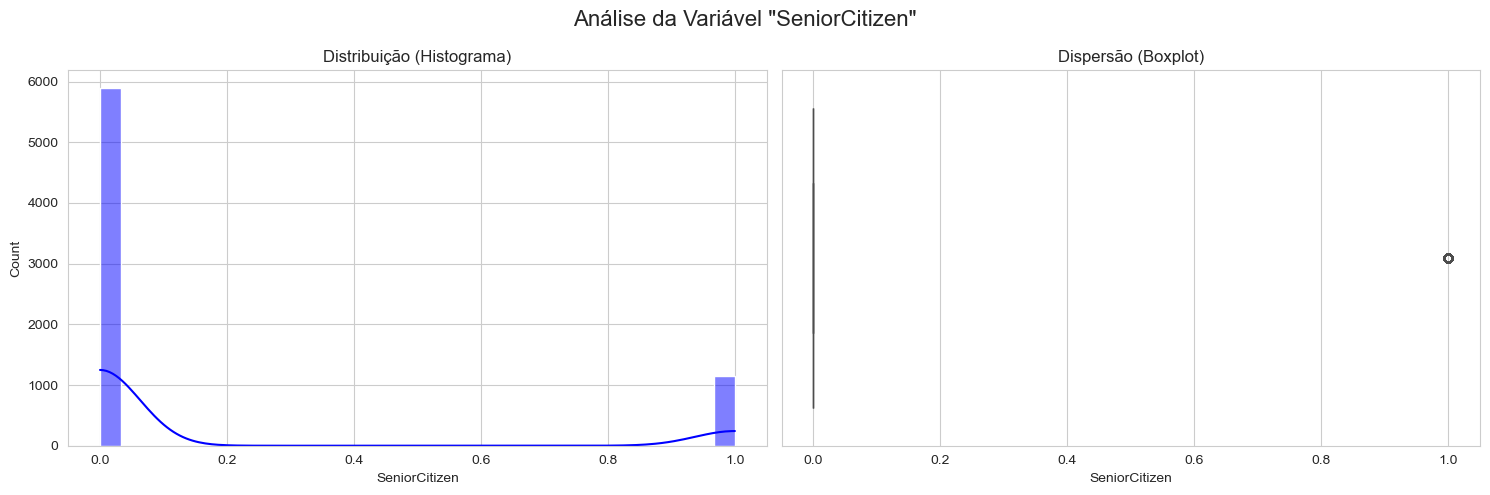


### Variável `SeniorCitizen` (Idoso ou Não)

- **Histograma**:  
  - A maioria dos clientes não é idosa (valor 0), só uma pequena parte é idosa (valor 1).  
  - Os dados estão bem desbalanceados.

- **Boxplot**:  
  - Mostra o mesmo: concentração em 0, com poucos em 1.  
  - Como a variável é binária, não há muita informação extra no boxplot.

- **O que isso pode indicar sobre Churn**:  
  - Idosos são minoria, mas podem ter comportamento diferente (ex.: custo maior).  
  - Vale a pena comparar a taxa de churn entre idosos e não idosos.

- **Próximos passos**:  
  - Fazer um gráfico de churn por 'SeniorCitizen'.  
  - Conferir se existe algum valor estranho além de 0 e 1 (usando `dados['SeniorCitizen'].unique()`).



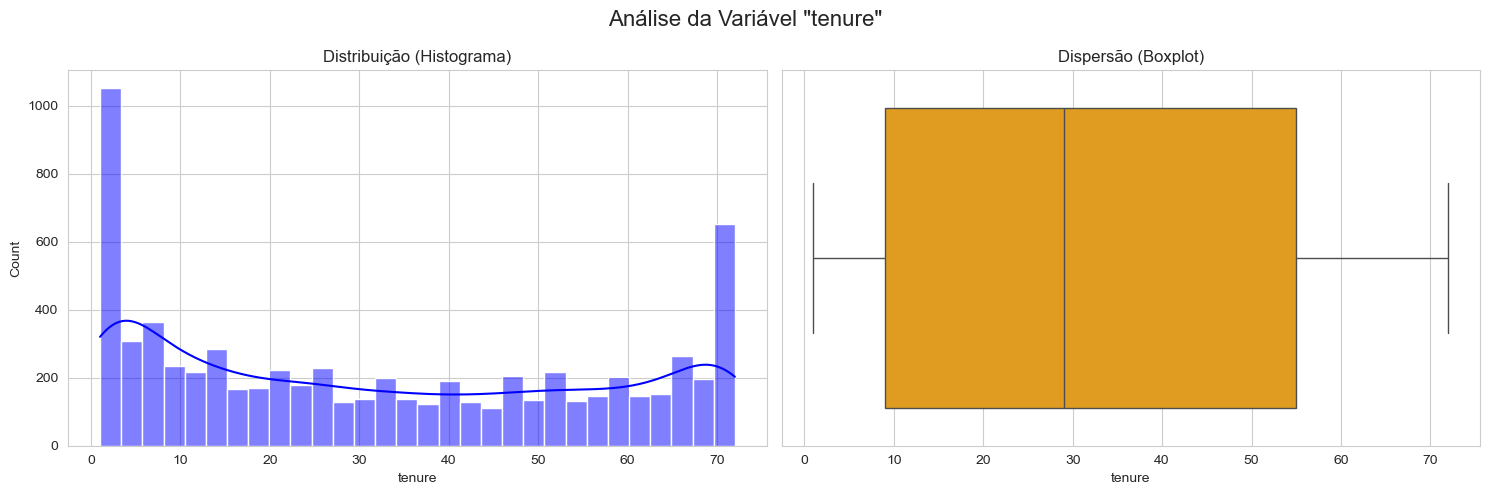


### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.



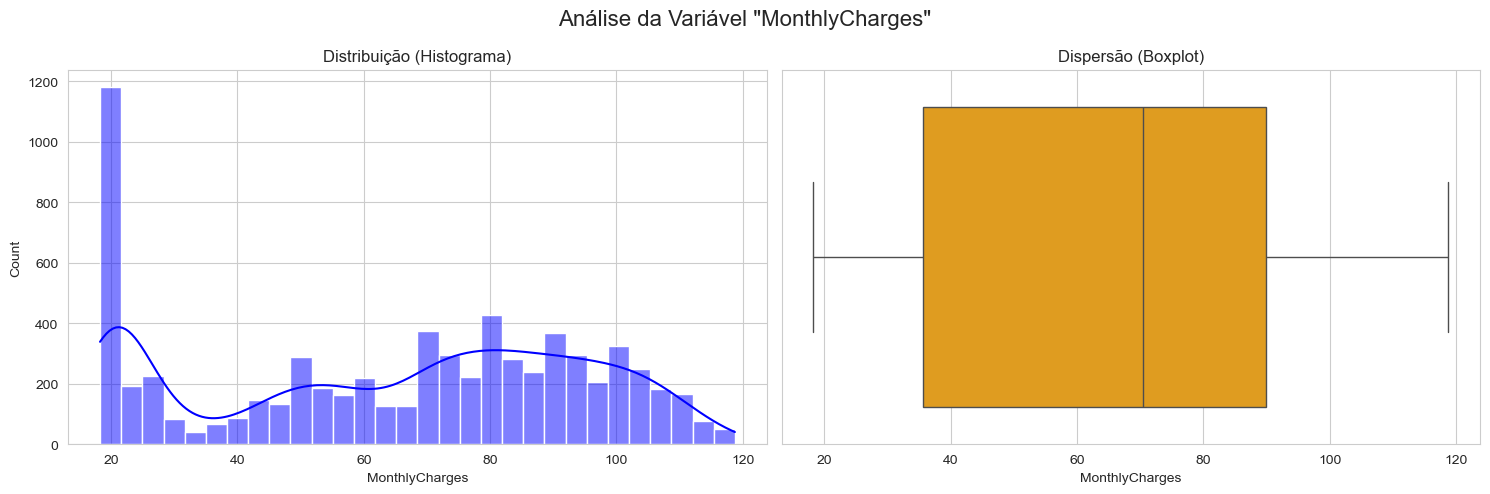


### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).



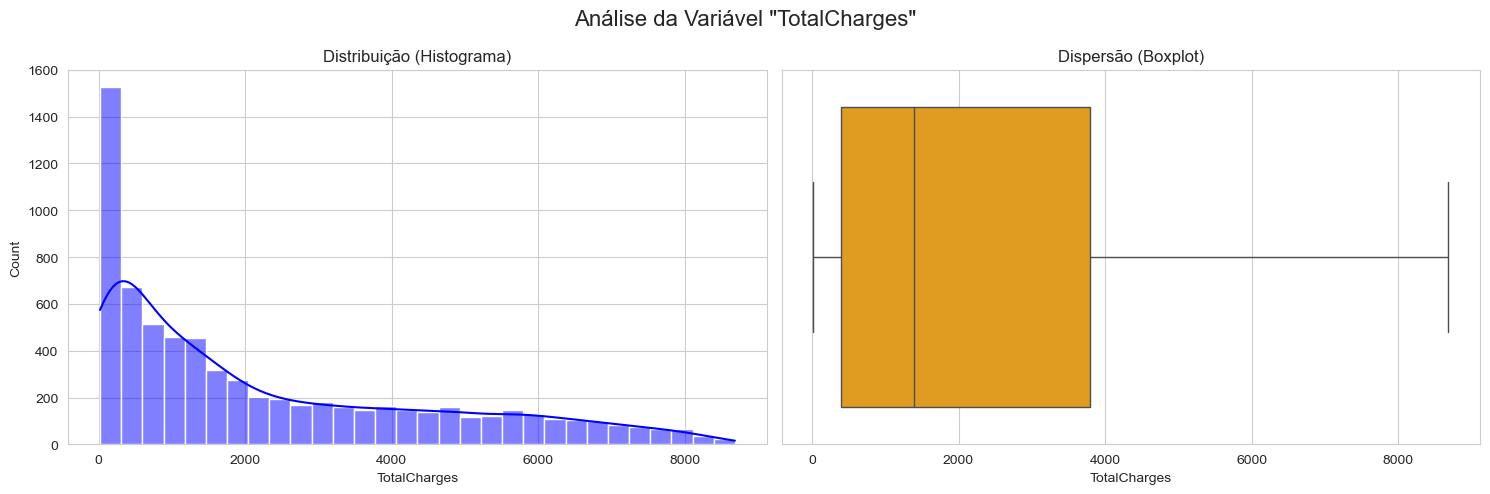


### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.



In [7]:

# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona nomes de colunas com tipos numéricos
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Dicionário com insights pré-definidos para cada coluna
insights = {
    'SeniorCitizen': """
### Variável `SeniorCitizen` (Idoso ou Não)

- **Histograma**:  
  - A maioria dos clientes não é idosa (valor 0), só uma pequena parte é idosa (valor 1).  
  - Os dados estão bem desbalanceados.

- **Boxplot**:  
  - Mostra o mesmo: concentração em 0, com poucos em 1.  
  - Como a variável é binária, não há muita informação extra no boxplot.

- **O que isso pode indicar sobre Churn**:  
  - Idosos são minoria, mas podem ter comportamento diferente (ex.: custo maior).  
  - Vale a pena comparar a taxa de churn entre idosos e não idosos.

- **Próximos passos**:  
  - Fazer um gráfico de churn por 'SeniorCitizen'.  
  - Conferir se existe algum valor estranho além de 0 e 1 (usando `dados['SeniorCitizen'].unique()`).

""",

    'tenure': """
### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.

""",

    'MonthlyCharges': """
### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).

""",

    'TotalCharges': """
### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.

"""
}

# Loop para gerar gráficos e exibir insights
for coluna in colunas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Análise da Variável "{coluna}"', fontsize=16)

    # Histograma (distribuição) com curva de densidade
    sns.histplot(data=dados, x=coluna, kde=True, ax=axes[0], color='blue', bins=30)
    axes[0].set_title('Distribuição (Histograma)')

    # Boxplot (dispersão, mediana, quartis, outliers)
    sns.boxplot(data=dados, x=coluna, ax=axes[1], color='orange')
    axes[1].set_title('Dispersão (Boxplot)')

    plt.tight_layout()
    plt.show()

    # Exibe o Markdown correspondente à coluna
    display(Markdown(insights[coluna]))
    print(f"\n{'='*80}")

### 3.1. Análise Bivariada - Variáveis Numéricas vs. Churn

Após entender as distribuições individuais, o próximo passo crucial é investigar como as variáveis numéricas se relacionam com a variável alvo, `Churn`. Quero descobrir se existem diferenças nos perfis de `tenure`, `MonthlyCharges` e `TotalCharges` entre os clientes que cancelaram e os que permaneceram. Para isso, vou usar boxplots comparativos.

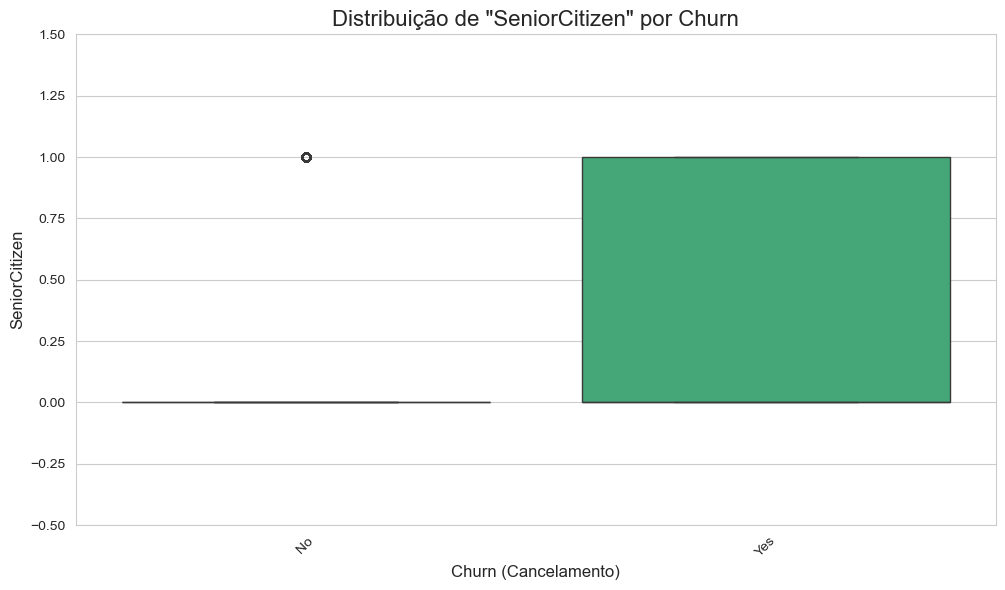


### Análise da Correlação entre 'SeniorCitizen' (Idoso ou Não) e 'Churn'
- **Boxplot**:
  - Distribuição de 'SeniorCitizen' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Idosos (1) têm maior chance de churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Calcular proporção de churn por 'SeniorCitizen' com `dados.groupby('SeniorCitizen')['Churn'].mean()`].

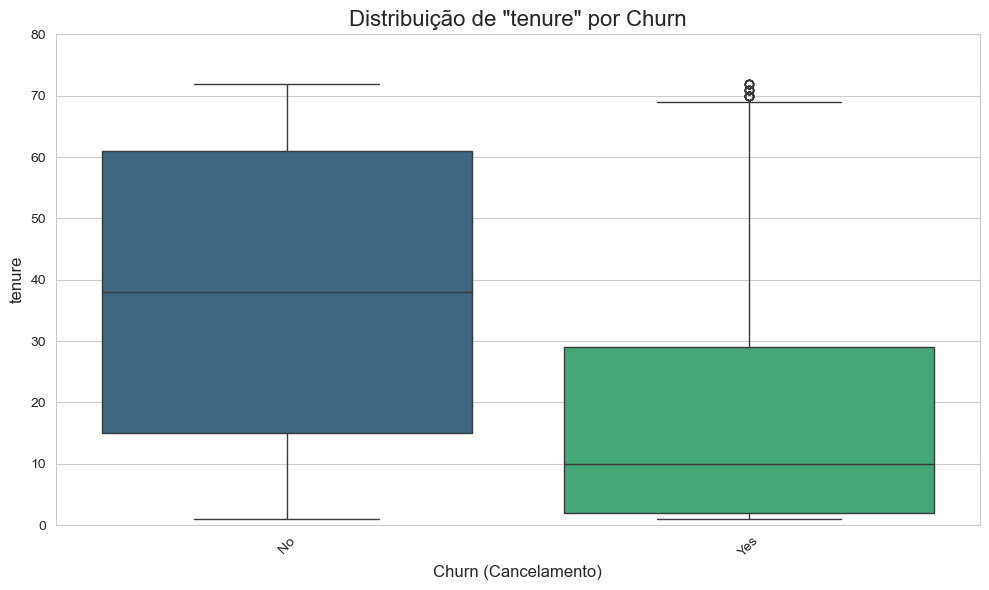


### Análise da Correlação entre 'tenure' (Tempo na Empresa) e 'Churn'
- **Boxplot**:
  - Distribuição de 'tenure' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Clientes com menor tenure têm maior chance de churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Calcular média de tenure por Churn com `dados.groupby('Churn')['tenure'].mean()`].

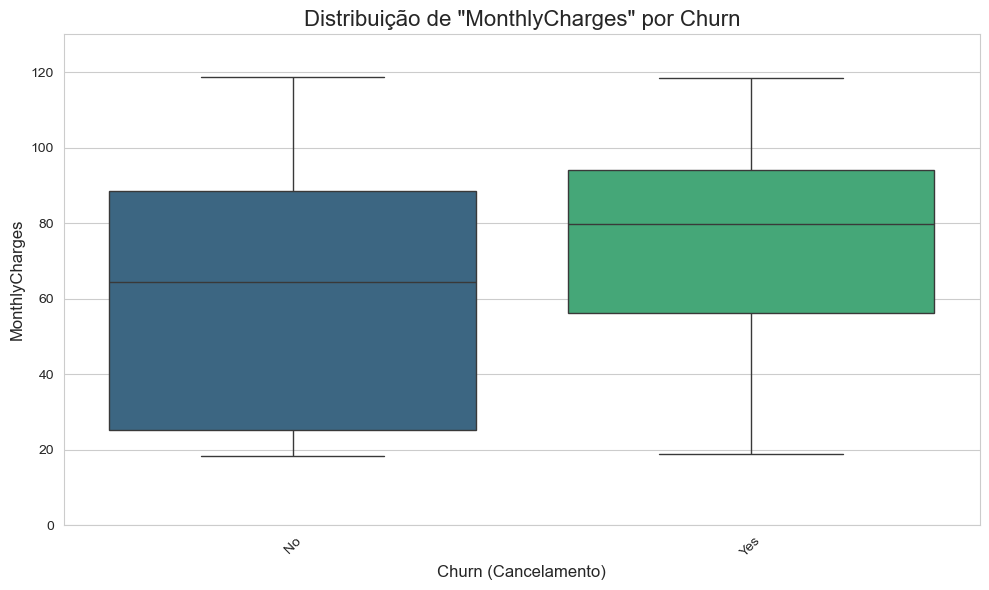


### Análise da Correlação entre 'MonthlyCharges' (Gastos Mensais) e 'Churn'
- **Boxplot**:
  - Distribuição de 'MonthlyCharges' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Gastos altos correlacionam com churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Cruzar com 'InternetService' para verificar impacto de planos caros].

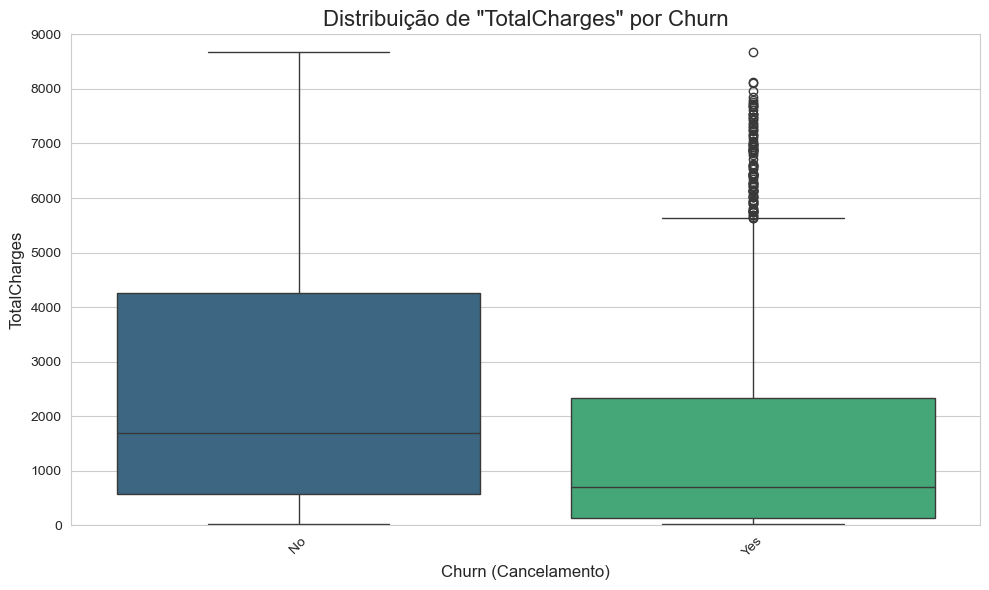


### Análise da Correlação entre 'TotalCharges' (Gastos Totais Acumulados) e 'Churn'
- **Boxplot**:
  - Distribuição de 'TotalCharges' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Baixos totais indicam churn precoce?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Analisar relação com 'tenure' via scatterplot].



Colunas numéricas disponíveis: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Valores únicos em 'Churn': ['No' 'Yes']


In [9]:
# Lista das colunas numéricas que quero analisar contra o Churn
# Usando select_dtypes para pegar todas as numéricas e ajustando manualmente se necessário
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Garantindo que todas as colunas desejadas estejam incluídas
colunas_numericas = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']  # Ordem explícita

# Dicionário com templates Markdown para cada coluna (a ser preenchido com insights)
insights = {
    'SeniorCitizen': """
### Análise da Correlação entre 'SeniorCitizen' (Idoso ou Não) e 'Churn'
- **Boxplot**:
  - Distribuição de 'SeniorCitizen' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Idosos (1) têm maior chance de churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Calcular proporção de churn por 'SeniorCitizen' com `dados.groupby('SeniorCitizen')['Churn'].mean()`].""",

    'tenure': """
### Análise da Correlação entre 'tenure' (Tempo na Empresa) e 'Churn'
- **Boxplot**:
  - Distribuição de 'tenure' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Clientes com menor tenure têm maior chance de churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Calcular média de tenure por Churn com `dados.groupby('Churn')['tenure'].mean()`].""",

    'MonthlyCharges': """
### Análise da Correlação entre 'MonthlyCharges' (Gastos Mensais) e 'Churn'
- **Boxplot**:
  - Distribuição de 'MonthlyCharges' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Gastos altos correlacionam com churn?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Cruzar com 'InternetService' para verificar impacto de planos caros].""",

    'TotalCharges': """
### Análise da Correlação entre 'TotalCharges' (Gastos Totais Acumulados) e 'Churn'
- **Boxplot**:
  - Distribuição de 'TotalCharges' por Churn (Yes/No).
  - Insight: [Adicione sua observação sobre a mediana, quartis ou diferenças entre Yes/No].
- **Implicações para Churn**: [Adicione implicações baseadas no gráfico, ex.: "Baixos totais indicam churn precoce?"].
- **Próximos Passos**: [Sugira próximos passos, ex.: "Analisar relação com 'tenure' via scatterplot]."""
}

# Criando um loop para gerar um boxplot para cada coluna numérica
for coluna in colunas_numericas:
    # Criando a figura
    plt.figure(figsize=(10, 6))
    
    # Criando o boxplot comparativo (com ajustes nos eixos)
    sns.boxplot(data=dados, x='Churn', y=coluna, hue='Churn', palette='viridis', legend=False)
    
    # Ajustes nos eixos
    plt.title(f'Distribuição de "{coluna}" por Churn', fontsize=16)
    plt.xlabel('Churn (Cancelamento)', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para evitar sobreposição
    plt.tight_layout()  # Ajusta o layout para evitar cortes
    
    # Definindo limites aproximados para o eixo Y (ajuste conforme seus dados)
    if coluna == 'SeniorCitizen':
        plt.ylim(-0.5, 1.5)  # Limita de -0.5 a 1.5 para binário (0 e 1)
    elif coluna == 'tenure':
        plt.ylim(0, 80)  # Limita de 0 a 80 para tenure
    elif coluna == 'MonthlyCharges':
        plt.ylim(0, 130)  # Limita de 0 a 130 para MonthlyCharges
    elif coluna == 'TotalCharges':
        plt.ylim(0, 9000)  # Limita de 0 a 9000 para TotalCharges
    
    # Exibindo o gráfico
    plt.show()
    
    # Exibe o Markdown correspondente à coluna
    display(Markdown(insights[coluna]))
    print("\n" + "="*80 + "\n")

# Verificação opcional dos dados (execute separadamente para debug)
print("Colunas numéricas disponíveis:", dados.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("Valores únicos em 'Churn':", dados['Churn'].unique())